In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

100%|██████████| 1.47M/1.47M [00:00<00:00, 91.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [31]:
# Importing necessary libraries
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading the original books dataset from the specified directory path
books = pd.read_csv(f"{path}/books.csv")
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


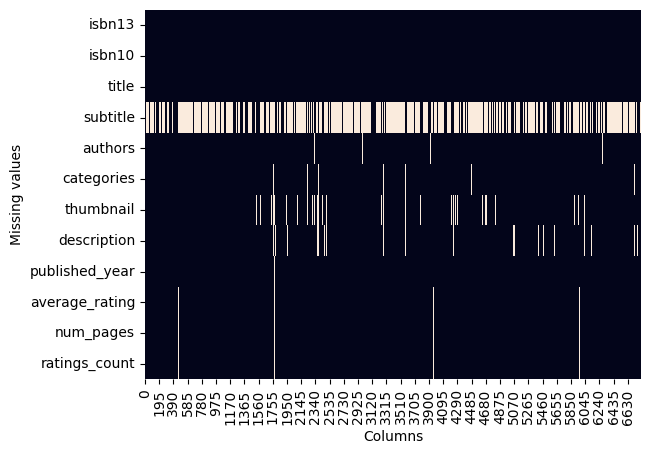

In [5]:
ax = plt.axes() # Create axes object
sns.heatmap(books.isna().transpose(), cbar = False, ax = ax) # Create heatmap

plt.xlabel("Columns") # X-axis label
plt.ylabel("Missing values") # Y-axis label

plt.show() # Show the plot

In [6]:
# Create a new column to indicate missing descriptions
books["missing_description"] = np.where(books["description"].isna(), 1, 0)

# Calculate the age of the book
books["age_of_book"] = 2024 - books["published_year"]

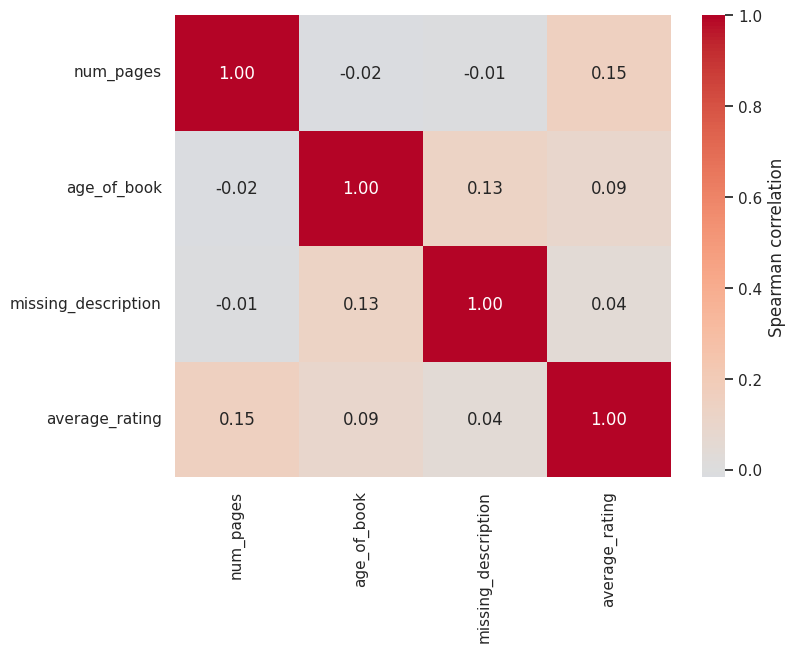

In [7]:
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"] # Define columns of interest

# Calculate Spearman correlation
correlation_matrix = books[columns_of_interest].corr(method = "spearman")

sns.set_theme(style = "white") # Set seaborn theme
plt.figure(figsize = (8, 6))   # Set the figure size
heatmap = sns.heatmap(correlation_matrix,
                      center = 0,
                      fmt = ".2f",
                      annot = True,
                      cmap = "coolwarm",
                      cbar_kws = {"label": "Spearman correlation"}
                      ) # Create heatmap

plt.show() # Show the plot

In [8]:
# Display rows with missing values in key columns
books[(books["description"].isna()) |
      (books["num_pages"].isna()) |
      (books["average_rating"].isna()) |
      (books["published_year"].isna())
]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,24.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,22.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,46.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,71.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,22.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,18.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,17.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,31.0


In [9]:
# Display rows without missing values in key columns
books_missing = books[~(books["description"].isna()) &
            ~(books["num_pages"].isna()) &
            ~(books["average_rating"].isna()) &
            ~(books["published_year"].isna())
]

books_missing # Display the cleaned dataset

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,43.0


In [10]:
# Analyze the distribution of categories in the cleaned dataset
books_missing["categories"].value_counts().reset_index().sort_values("count", ascending = False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,"Adventure stories, English",1
518,Germany,1
517,Egypt,1
516,Apartments,1


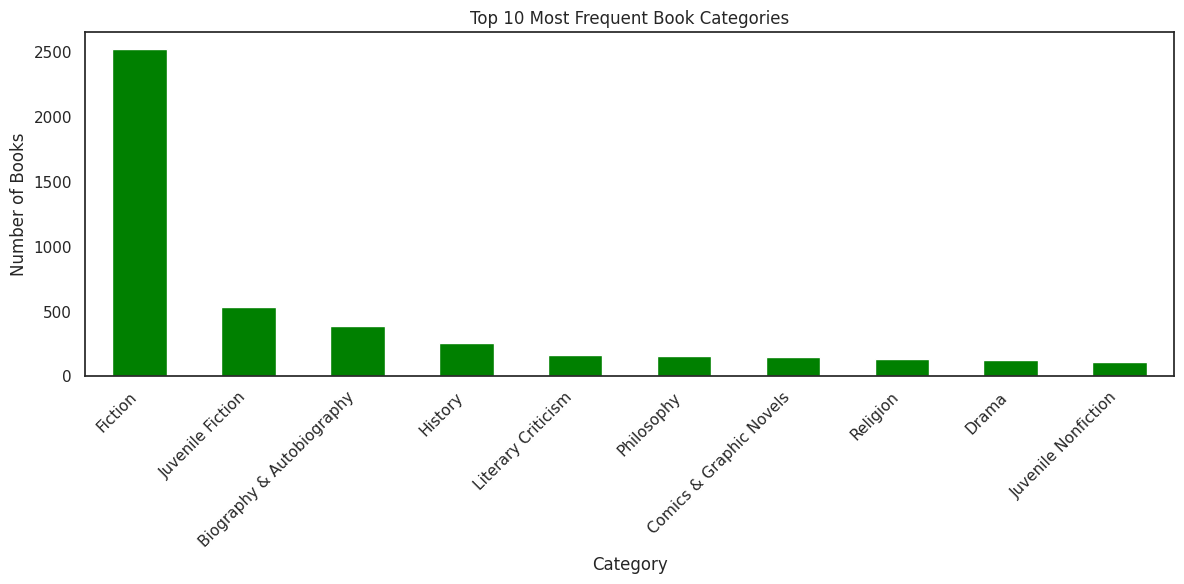

In [11]:
# Get top 10 categories
top_categories = (                                 # Start of expression
    books_missing["categories"]                    # Select the 'categories' column
    .value_counts()                                # Count occurrences of each category
    .head(10)                                      # Select top 10 categories
)

plt.figure(figsize = (12, 6))                      # Set the figure size
top_categories.plot(kind = 'bar', color = 'green') # Create bar plot
plt.title("Top 10 Most Frequent Book Categories")  # Title of the plot
plt.xlabel("Category")                             # X-axis label
plt.ylabel("Number of Books")                      # Y-axis label
plt.xticks(rotation = 45, ha = 'right')            # Rotate x-axis labels for better readability
plt.tight_layout()                                 # Adjust layout to prevent clipping
plt.show()                                         # Display the plot

In [12]:
# Add a new column for word count in description
books_missing.loc[:, "words_in_description"] = (
    books_missing["description"].str.split().str.len()
)

/tmp/ipython-input-1339339929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing.loc[:, "words_in_description"] = (


In [13]:
books_missing # Display the cleaned dataset with word count column

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,43.0,245


In [14]:
# Display descriptions with 25 to 34 words
books_missing.loc[books_missing["words_in_description"].between(25, 34), "description"]

,description
9,Kate Blackwell is an enigma and one of the mos...
14,"Available in the U.S. for the first time, this..."
20,"It is 1937, and Charles Ashworth, a Canon to t..."
21,Reissue of the author's most famous and well-l...
46,No one believes a little girl when she insists...
...,...
6760,"Joel, an English teacher, has never really lik..."
6766,Discusses the historical and intellectual back...
6775,Presents nearly one thousand recipes--from app...
6779,Edited by the creator and executive producer o...


In [15]:
# Filter books with at least 25 words in description
books_missing_25_words = books_missing[books_missing["words_in_description"] >= 25].copy()
books_missing_25_words # Display the filtered dataset

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174


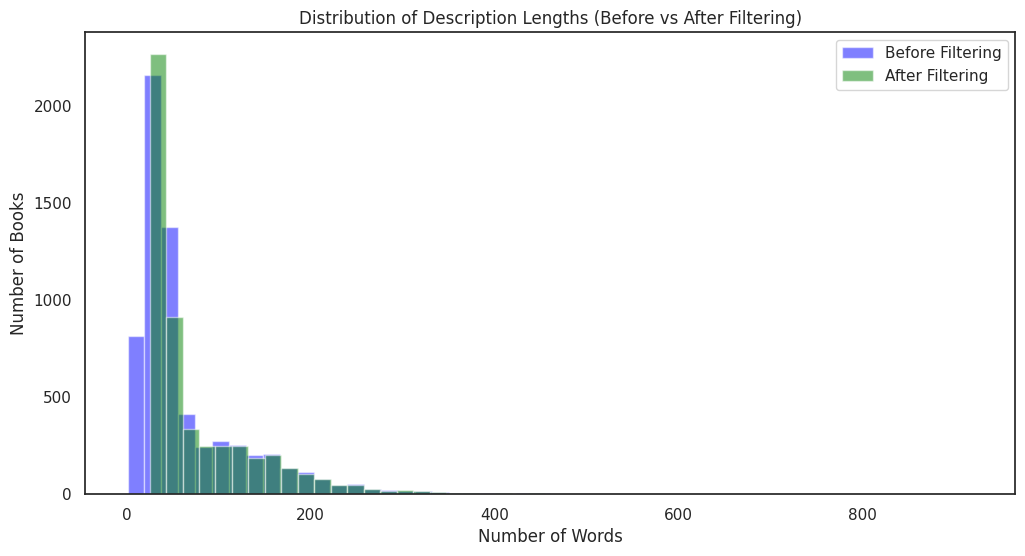

In [16]:
# Saving the words_in_description column from the original dataset (before filtering)
old_data = books_missing["words_in_description"]

# Saving the words_in_description column from the filtered dataset (after filtering)
new_data = books_missing_25_words["words_in_description"]

# Setting the size of the visualization figure
plt.figure(figsize = (12, 6))

# Plotting the histogram for the original dataset
plt.hist(old_data, bins = 50, alpha = 0.5, label = "Before Filtering", color = "blue")

# Plotting the histogram for the filtered dataset
plt.hist(new_data, bins = 50, alpha = 0.5, label = "After Filtering", color = "green")

# Adding the title of the plot
plt.title("Distribution of Description Lengths (Before vs After Filtering)")

# Adding the x-axis label
plt.xlabel("Number of Words")

# Adding the y-axis label
plt.ylabel("Number of Books")

# Displaying the legend
plt.legend()

# Showing the complete plot
plt.show()

In [17]:
# Create a new column combining title and subtitle
books_missing_25_words["title_and_subtitle"] = (
    np.where(books_missing_25_words["subtitle"].isna(),
             books_missing_25_words["title"],
             books_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis = 1))
)

# Add a new column combining isbn13 and description
books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis = 1)

In [18]:
# Display the final dataset
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [19]:
# Save the cleaned dataset to a new CSV file
output_path = "/content/drive/MyDrive/Colab Notebooks/NLP/NLP Project/books_cleaned.csv"

books_missing_25_words.drop(
    ["subtitle", "missing_description", "age_of_book", "words_in_description"], axis = 1
).to_csv(output_path, index = False)

In [23]:
# Summary statistics for report
print("=" * 60)
print("Data summary statistics")
print("=" * 60)

# Original dataset
print("\nOriginal dataset:")
print(f"Total books: {len(books):,}")
print(f"Missing descriptions: {books['description'].isna().sum():,} "
      f"({books['description'].isna().sum() / len(books) * 100:.1f}%)")

# After basic cleaning
print("\nAfter removing missing key fields:")
print(f"Total books: {len(books_missing):,}")
print(f"Data retention: {len(books_missing) / len(books) * 100:.1f}%")
print(f"Records removed: {(len(books) - len(books_missing)):,}")

# After description length filtering
print("\nAfter 25–word description filter:")
print(f"Total books: {len(books_missing_25_words):,}")
print(f"Data retention: {len(books_missing_25_words) / len(books) * 100:.1f}%")
print(f"Records removed: {(len(books_missing) - len(books_missing_25_words)):,}")

# Description statistics
print("\nDescription length statistics:")
print("\nBefore filtering:")
print(books_missing["words_in_description"].describe())

print("\nAfter filtering:")
print(books_missing_25_words["words_in_description"].describe())

# Category statistics
print("\nCategory statistics:")
unique_categories = books_missing_25_words["categories"].nunique()
top_category = books_missing_25_words["categories"].value_counts().index[0]
top_count = books_missing_25_words["categories"].value_counts().iloc[0]
top_pct = top_count / len(books_missing_25_words) * 100

print(f"Unique categories: {unique_categories}")
print(f"Top category: {top_category}")
print(f"Top category count: {top_count} ({top_pct:.1f}%)")

print("\n" + "=" * 60)

Data summary statistics

Original dataset:
Total books: 6,810
Missing descriptions: 262 (3.8%)

After removing missing key fields:
Total books: 6,507
Data retention: 95.6%
Records removed: 303

After 25–word description filter:
Total books: 5,197
Data retention: 76.3%
Records removed: 1,310

Description length statistics:

Before filtering:
count    6507.000000
mean       66.325803
std        66.120291
min         1.000000
25%        27.000000
50%        40.000000
75%        82.000000
max       920.000000
Name: words_in_description, dtype: float64

After filtering:
count    5197.000000
mean       78.774485
std        68.532750
min        25.000000
25%        35.000000
50%        47.000000
75%       105.000000
max       920.000000
Name: words_in_description, dtype: float64

Category statistics:
Unique categories: 479
Top category: Fiction
Top category count: 2111 (40.6%)



In [22]:
# Data quality validation
print("\nData quality checks:")

# Check for remaining missing values in critical columns
critical_columns = ["isbn13", "title", "description", "categories", "published_year"]
print("\nMissing values in critical columns:")

for col in critical_columns:
    missing = books_missing_25_words[col].isna().sum()
    print(f"  {col}: {missing}")

# Check for duplicates
duplicates = books_missing_25_words.duplicated(subset=["isbn13"]).sum()
print(f"\nDuplicate isbn13 entries: {duplicates}")

# Check description length compliance
min_words = books_missing_25_words["words_in_description"].min()
print(f"\nMinimum words in description: {min_words}")

assert min_words >= 25, "Error: some descriptions have fewer than 25 words."

# Final status
print("\nAll data quality checks passed.")


Data quality checks:

Missing values in critical columns:
  isbn13: 0
  title: 0
  description: 0
  categories: 30
  published_year: 0

Duplicate isbn13 entries: 0

Minimum words in description: 25

All data quality checks passed.


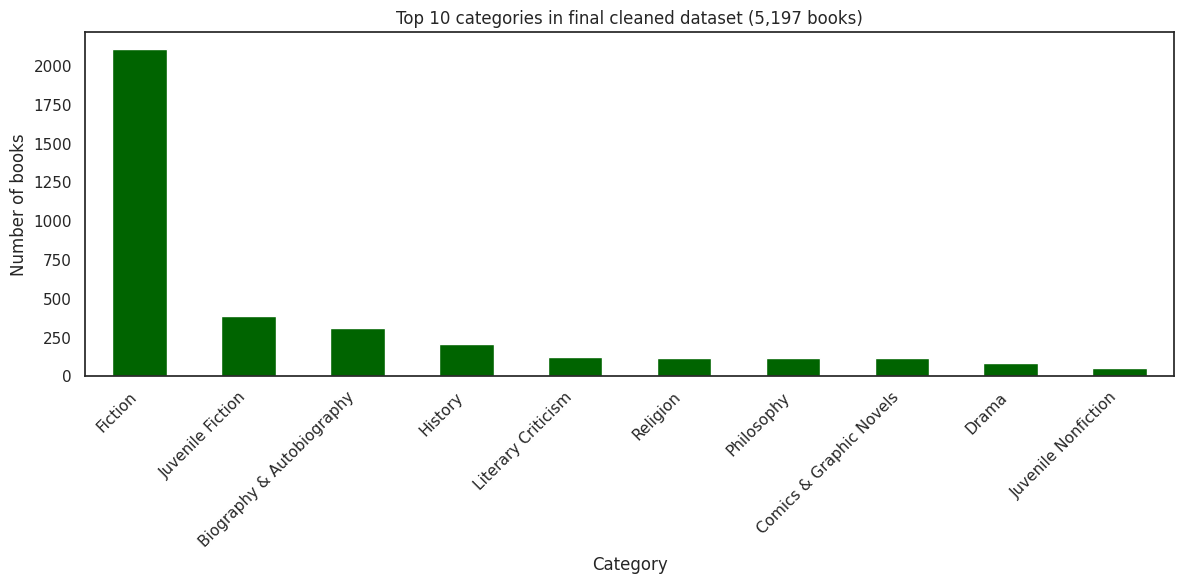


Category distribution comparison:
Categories before cleaning: 531
Categories after cleaning: 479


In [24]:
# Final category distribution
# Getting top 10 categories in final cleaned dataset
top_categories_final = (
    books_missing_25_words["categories"]
    .value_counts()
    .head(10)
)

plt.figure(figsize = (12, 6))
top_categories_final.plot(kind = "bar", color = "darkgreen")
plt.title("Top 10 categories in final cleaned dataset (5,197 books)")
plt.xlabel("Category")
plt.ylabel("Number of books")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()

# Compare category distribution before and after cleaning
print("\nCategory distribution comparison:")
print(f"Categories before cleaning: {books_missing['categories'].nunique()}")
print(f"Categories after cleaning: {books_missing_25_words['categories'].nunique()}")

In [25]:
# Preview Cleaned Data
print("\nSample cleaned records:")
print("\nRandom sample of 3 books:")

sample = books_missing_25_words.sample(3, random_state = 42)

for idx, row in sample.iterrows():
    print(f"\n{'=' * 60}")
    print(f"Title: {row['title_and_subtitle']}")
    print(f"Category: {row['categories']}")
    print(f"Words in description: {row['words_in_description']}")
    print(f"Description preview: {row['description'][:150]}...")


Sample cleaned records:

Random sample of 3 books:

Title: The Fantastic Vampire: Studies in the Children of the Night : Selected Essays from the Eighteenth International Conference on the Fantastic in the Arts
Category: Literary Criticism
Words in description: 134
Description preview: Wherever vampires existed in the imaginations of different peoples, they adapted themselves to the customs of the local culture. In The Vampyre (1819)...

Title: The voyage of the Dawn Treader
Category: Juvenile Fiction
Words in description: 65
Description preview: The "Dawn Treader" is the first ship Narnia has seen in centuries. King Caspian has built it for his voyage to find the seven lords, good men whom his...

Title: A Farewell to Arms?: Beyond the Good Friday Agreement, Second Edition
Category: History
Words in description: 35
Description preview: Neither naively optimistic nor hopelessley pessimistic, this collection of writings by experts on the history of the troubles in Northern Ireland pain

In [26]:
# Export cleaning metadata
metadata = {
    "cleaning_date"              : datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "original_records"           : len(books),
    "final_records"              : len(books_missing_25_words),
    "retention_rate"             : f"{len(books_missing_25_words) / len(books) * 100:.2f}%",
    "min_description_words"      : 25,
    "columns_dropped"            : ["subtitle", "missing_description", "age_of_book", "words_in_description"],
    "columns_added"              : ["title_and_subtitle", "tagged_description"],
    "unique_categories"          : int(books_missing_25_words["categories"].nunique()),
    "avg_words_per_description"  : float(books_missing_25_words["words_in_description"].mean()),
}

metadata_path = "/content/drive/MyDrive/Colab Notebooks/NLP/NLP Project/cleaning_metadata.json"

with open(metadata_path, "w") as f:
    json.dump(metadata, f, indent = 2)

print("\nMetadata saved to:", metadata_path)
print(json.dumps(metadata, indent = 2))


Metadata saved to: /content/drive/MyDrive/Colab Notebooks/NLP/NLP Project/cleaning_metadata.json
{
  "cleaning_date": "2025-12-06 17:58:06",
  "original_records": 6810,
  "final_records": 5197,
  "retention_rate": "76.31%",
  "min_description_words": 25,
  "columns_dropped": [
    "subtitle",
    "missing_description",
    "age_of_book",
    "words_in_description"
  ],
  "columns_added": [
    "title_and_subtitle",
    "tagged_description"
  ],
  "unique_categories": 479,
  "avg_words_per_description": 78.77448527996921
}


In [32]:
# Comprehensive report statistics and validation
from datetime import datetime

print("=" * 80)
print(" " * 25 + "Final report statistics")
print("=" * 80)

# 1. Summary statistics
print("\nDataset transformation summary:")
print(f"\nOriginal dataset: {len(books):,} books")
print(
    f"After removing missing key fields: {len(books_missing):,} books "
    f"({len(books_missing) / len(books) * 100:.1f}% retained)"
)
print(
    f"After 25-word filter: {len(books_missing_25_words):,} books "
    f"({len(books_missing_25_words) / len(books) * 100:.1f}% retained)"
)
print(
    f"Total records removed: {len(books) - len(books_missing_25_words):,} "
    f"({(len(books) - len(books_missing_25_words)) / len(books) * 100:.1f}%)"
)

# 2. Description statistics
print("\nDescription length analysis:")

desc_stats_before = books_missing["words_in_description"].describe()
desc_stats_after = books_missing_25_words["words_in_description"].describe()

print("\nBefore 25-word filter:")
print(f"  Mean: {desc_stats_before['mean']:.1f} words")
print(f"  Median: {desc_stats_before['50%']:.1f} words")
print(f"  Min: {desc_stats_before['min']:.0f} words")
print(f"  Max: {desc_stats_before['max']:.0f} words")

print("\nAfter 25-word filter:")
print(f"  Mean: {desc_stats_after['mean']:.1f} words")
print(f"  Median: {desc_stats_after['50%']:.1f} words")
print(f"  Min: {desc_stats_after['min']:.0f} words")
print(f"  Max: {desc_stats_after['max']:.0f} words")

# 3. Category analysis
print("\nCategory distribution:")

print(f"Total unique categories: {books_missing_25_words['categories'].nunique()}")

top_cat = books_missing_25_words["categories"].value_counts()
print("\nTop 5 categories:")

for i, (cat, count) in enumerate(top_cat.head(5).items(), 1):
    print(
        f"  {i}. {cat}: {count} books "
        f"({count / len(books_missing_25_words) * 100:.1f}%)"
    )

# 4. Data quality checks
print("\nData quality validation:")

critical_columns = ["isbn13", "title", "description", "categories", "published_year"]
all_clean = True

for col in critical_columns:
    missing = books_missing_25_words[col].isna().sum()
    status = "ok" if missing == 0 else "missing"
    print(f"  {col}: {missing} ({status})")
    if missing > 0:
        all_clean = False

duplicates = books_missing_25_words.duplicated(subset = ["isbn13"]).sum()
duplicates_status = "ok" if duplicates == 0 else "duplicates found"
print(f"  Duplicates: {duplicates} ({duplicates_status})")

min_words = books_missing_25_words["words_in_description"].min()
min_words_status = "ok" if min_words >= 25 else "below threshold"
print(f"  Min description length: {min_words} words ({min_words_status})")

if all_clean and duplicates == 0 and min_words >= 25:
    print("\nAll quality checks passed.")
else:
    print("\nWarning: some quality issues detected.")

# 5. Sample preview
print("\nSample cleaned records:")

sample = books_missing_25_words.sample(2, random_state = 42)

for idx, row in sample.iterrows():
    print(f"\n{'-' * 80}")
    print(f"Title: {row['title_and_subtitle'][:70]}")
    print(f"Category: {row['categories']}")
    print(f"Words: {row['words_in_description']}")
    print(f"Description: {row['description'][:120]}...")

# 6. Export metadata
import json
from datetime import datetime

metadata = {
    "cleaning_date"             : datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "original_records"          : int(len(books)),
    "final_records"             : int(len(books_missing_25_words)),
    "retention_rate"            : f"{len(books_missing_25_words) / len(books) * 100:.2f}%",
    "records_removed"           : int(len(books) - len(books_missing_25_words)),
    "min_description_words"     : 25,
    "avg_description_words"     : float(books_missing_25_words["words_in_description"].mean()),
    "median_description_words"  : float(books_missing_25_words["words_in_description"].median()),
    "unique_categories"         : int(books_missing_25_words["categories"].nunique()),
    "top_category"              : books_missing_25_words["categories"].value_counts().index[0],
    "top_category_percentage"   : (
        f"{books_missing_25_words['categories'].value_counts().iloc[0] / len(books_missing_25_words) * 100:.2f}%"
    ),
}

metadata_path = "/content/drive/MyDrive/Colab Notebooks/NLP/NLP Project/cleaning_metadata.json"

with open(metadata_path, "w") as f:
    json.dump(metadata, f, indent = 2)

print(f"\nMetadata saved to: {metadata_path}")
print("\n" + "=" * 80)

                         Final report statistics

Dataset transformation summary:

Original dataset: 6,810 books
After removing missing key fields: 6,507 books (95.6% retained)
After 25-word filter: 5,197 books (76.3% retained)
Total records removed: 1,613 (23.7%)

Description length analysis:

Before 25-word filter:
  Mean: 66.3 words
  Median: 40.0 words
  Min: 1 words
  Max: 920 words

After 25-word filter:
  Mean: 78.8 words
  Median: 47.0 words
  Min: 25 words
  Max: 920 words

Category distribution:
Total unique categories: 479

Top 5 categories:
  1. Fiction: 2111 books (40.6%)
  2. Juvenile Fiction: 390 books (7.5%)
  3. Biography & Autobiography: 311 books (6.0%)
  4. History: 207 books (4.0%)
  5. Literary Criticism: 124 books (2.4%)

Data quality validation:
  isbn13: 0 (ok)
  title: 0 (ok)
  description: 0 (ok)
  categories: 30 (missing)
  published_year: 0 (ok)
  Duplicates: 0 (ok)
  Min description length: 25 words (ok)


Sample cleaned records:

-------------------------